In [1]:
import numpy as np
from matplotlib.pyplot import imread,imshow
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import Adam
from keras.applications import resnet50
%matplotlib inline  

Using TensorFlow backend.


In [4]:
filepath = r"E:\Users\Tejan\PycharmProjects\FacialBeauty\SCUT-FBP5500_v2\\"

In [5]:
def build_model():
    rn = resnet50.ResNet50(include_top=False,pooling='avg')
    model = Sequential()
    model.add(rn)
    model.add(Dense(1))

    model.layers[0].trainable = False

    print(model.summary())

    model.compile(loss='mse',optimizer=Adam())
    return model

In [6]:
def train_model(model,epochs=15):
    model.fit(batch_size=32,x=images,y=scores, epochs=epochs)
    return model

In [7]:
def load_data(filepath):
    f = open(filepath+r"train_test_files\60_40_split\train.txt",'r')

    images = []
    scores = []
    for line in f:
        line = line.replace('\n','')
        line = line.split(' ')
        image = imread(filepath+r"Images\\"+line[0])
        images.append(image)
        scores.append(float(line[1]))

    images = np.array(images)
    return images,scores
images,scores = load_data(filepath)

In [8]:
model = build_model()
model.load_weights('FBP.h5')


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Model)             (None, 2048)              23587712  
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 2049      
Total params: 23,589,761
Trainable params: 2,049
Non-trainable params: 23,587,712
_________________________________________________________________
None


In [13]:
model = train_model(model,4)
model.save_weights('FBP.h5')

Epoch 1/4
3300/3300 [==============================] - 47s 14ms/step - loss: 0.2309
Epoch 2/4
3300/3300 [==============================] - 43s 13ms/step - loss: 0.2065
Epoch 3/4
3300/3300 [==============================] - 43s 13ms/step - loss: 0.1879
Epoch 4/4
3300/3300 [==============================] - 43s 13ms/step - loss: 0.1913


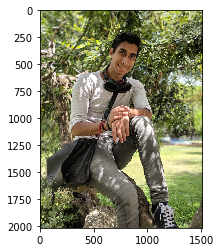

In [9]:
image = []
image.append(imread(r'E:\Users\Tejan\PycharmProjects\FacialBeauty\FBFB.jpg'))
image=np.array(image)
imshow(image[0])

In [18]:
print(model.predict(image))

[[2.8734844]]


In [16]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 10602290127852748979
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 3168845824
locality {
  bus_id: 1
  links {
  }
}
incarnation: 5682326275389637811
physical_device_desc: "device: 0, name: GeForce GTX 970, pci bus id: 0000:06:00.0, compute capability: 5.2"
]
